(buckled-layer-nb)=
# Slab geometry

This is a simple illustration of a slab geometry in which
the orbitals are specified in a 3D space, but the system is only
extensive in 2D, so that k-space is only 2D.

In [1]:
from pythtb.tb_model import TBModel 
import matplotlib.pyplot as plt

In [2]:
# define 3D real-space lattice vectors
lat = [[1, 0, 0], [0, 1.25, 0], [0, 0, 3]]
# define coordinates of orbitals in reduced units
orb = [[0, 0, -0.15], [0.5, 0.5, 0.15]]

# only first two lattice vectors repeat, so k-space is 2D
my_model = TBModel(2, 3, lat, orb)

delta = 1.1
t = 0.6

# set on-site energies
my_model.set_onsite([-delta, delta])
# set hoppings (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 1, 0, [0, 0, 0])
my_model.set_hop(t, 1, 0, [1, 0, 0])
my_model.set_hop(t, 1, 0, [0, 1, 0])
my_model.set_hop(t, 1, 0, [1, 1, 0])

print(my_model)

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 3
k-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 2
number of electronic states = 2

Lattice vectors (Cartesian):
  # 0 ===> [ 1.000 ,    0   ,    0   ]
  # 1 ===> [   0   ,  1.250 ,    0   ]
  # 2 ===> [   0   ,    0   ,  3.000 ]
Orbital vectors (dimensionless):
  # 0 ===> [   0   ,    0   , -0.150 ]
  # 1 ===> [ 0.500 ,  0.500 ,  0.150 ]
Site energies:
  # 0 ===> -1.100 
  # 1 ===>  1.100 
Hoppings:
  < 1 | H | 0 + [ 0.0 ,  0.0 ,  0.0 ] >  ===> 0.6000 
  < 1 | H | 0 + [ 1.0 ,  0.0 ,  0.0 ] >  ===> 0.6000 
  < 1 | H | 0 + [ 0.0 ,  1.0 ,  0.0 ] >  ===> 0.6000 
  < 1 | H | 0 + [ 1.0 ,  1.0 ,  0.0 ] >  ===> 0.6000 
Hopping distances:
  | pos(1) - pos(0 + [ 0.0 ,  0.0 ,  0.0 ]) | =  1.204 
  | pos(1) - pos(0 + [ 1.0 ,  0.0 ,  0.0 ]) | =  1.204 
  | pos(1) -

## Band structure calculation

Now we specify the k-space path for the band structure calculation by listing a set of nodes. The path will consist of straight line segments connecting these nodes.

In [3]:
path = [[0.0, 0.0], [0.0, 0.5], [0.5, 0.5], [0.0, 0.0]]
# specify labels for these nodal points
label = (r"$\Gamma $", r"$X$", r"$M$", r"$\Gamma $")

### `TBModel.plot_bands`

We can find the bands in two different ways. First we will use the `TBModel.plot_bands` method to visualize the band structure.
This is useful for quickly assessing the overall shape of the band structure and identifying key features such as band gaps and degeneracies.

(<Figure size 640x480 with 1 Axes>, <Axes: ylabel='Energy $E(\\mathbf{{k}})$'>)

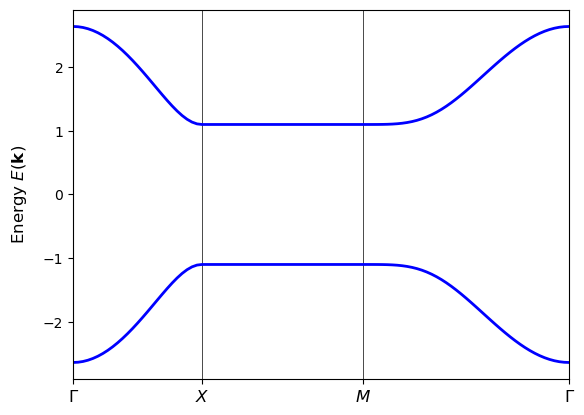

In [4]:
my_model.plot_bands(path, k_label=label)

### `TBModel.solve_ham`

Alternatively, we can use the `TBModel.solve_ham` method to compute the band structure directly. This method requires the k-points to be specified as input. To generate the k-points, we can use the `TBModel.k_path` method to construct the path through k-space, passing the desired path and the number of k-points as arguments. The `k_path` method will return the k-vectors, the distances along the path, and the original node positions.

In [5]:
(k_vec, k_dist, k_node) = my_model.k_path(path, 81)

----- k_path report -----
Real-space lattice vectors:
 [[1.   0.   0.  ]
 [0.   1.25 0.  ]]
K-space metric tensor:
 [[1.   0.  ]
 [0.   0.64]]
Nodes (reduced coords):
 [[0.  0. ]
 [0.  0.5]
 [0.5 0.5]
 [0.  0. ]]
Segments:
  Node 0 [0. 0.] to Node 1 [0.  0.5]: distance = 0.40000
  Node 1 [0.  0.5] to Node 2 [0.5 0.5]: distance = 0.50000
  Node 2 [0.5 0.5] to Node 3 [0. 0.]: distance = 0.64031
Node distances (cumulative): [0.      0.4     0.9     1.54031]
Node indices in path: [ 0 21 47 80]
-------------------------


Now we can call the `TBModel.solve_ham` method with the k-vectors obtained from `k_path` to compute the band structure.

In [6]:
evals = my_model.solve_ham(k_vec)

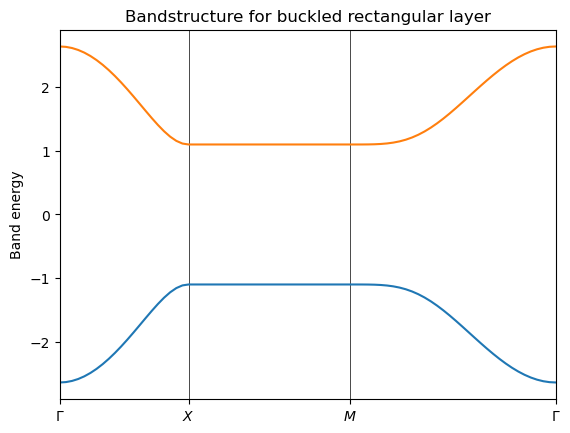

In [7]:
fig, ax = plt.subplots()
ax.set_title("Bandstructure for buckled rectangular layer")
ax.set_ylabel("Band energy")

# specify horizontal axis details
ax.set_xlim(k_node[0], k_node[-1])
# put tickmarks and labels at node positions
ax.set_xticks(k_node)
ax.set_xticklabels(label)
# add vertical lines at node positions
for n in range(len(k_node)):
    ax.axvline(x=k_node[n], linewidth=0.5, color="k")

ax.plot(k_dist, evals)